# Vertrauensintervall Binomialverteilung

## Zweiseitig

Wir beginnen mit einer Binomialverteilung mit $n=50$ und $\pi=0.5$. Eingezeichnet ist noch auf beiden Seiten rot der Verwerfungsbereich auf Signifikanzniveau 5%. Das heisst, hier ist die Nullhypothese $\pi_0=0.5$.

In [335]:
%matplotlib inline

from scipy.stats import binom 
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,5)
import numpy as np
n = 50
p_0 = 0.5

Wir machen nun Beobachtungen, die orange eingezeichnet sind. So wird für $k=20$ die Nullhypothese nicht verworfen, für $k=32$ aber schon.

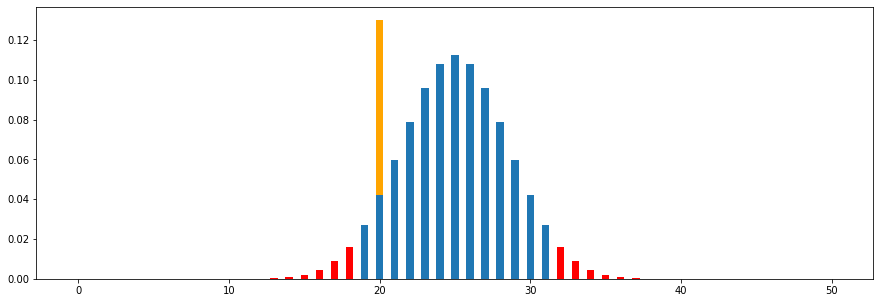

In [337]:
k = 20
x = np.arange(n+1)
y = binom.pmf(k=x,n=n,p=p_0)

plt.bar([k,k],[0,.13], color="orange", width=.5)
plt.bar(x,y, width=.5)

x_u = np.arange(binom.ppf(q=0.025, n=n, p=p_0)+1)
y_u = binom.pmf(k=x_u, n=n, p=p_0)
plt.bar(x_u, y_u, color= "red", width=.5)

x_o = np.arange(binom.ppf(q=0.975, n=n, p=p_0), n+1)
y_o = binom.pmf(k=x_o, n=n, p=p)
plt.bar(x_o, y_o, color= "red", width=.5);

Im folgenden werden wir das $\pi_0$ ändern, aber die Beobachtung $k$ konstant lassen. Ziel ist es diejenigen $\pi_0$ zu finden, für die Nullhypothese _nicht_ verworfen wird.

Um dies zu vereinfachen, definieren wir den Plot oben als Funktion vom $\pi$

In [345]:
def conf_int(p,k):
  x = np.arange(n+1)
  y = binom.pmf(k=x,n=n,p=p)
  plt.bar([k,k],[0,.12], color="orange", width=.5)
  plt.bar(x,y, width=.5)

  x_u = np.arange(binom.ppf(q=0.025, n=n, p=p)+1)
  y_u = binom.pmf(k=x_u, n=n, p=p)
  plt.bar(x_u, y_u, color= "red", width=.5)

  x_o = np.arange(binom.ppf(q=0.975, n=n, p=p), n+1)
  y_o = binom.pmf(k=x_o, n=n, p=p)
  plt.bar(x_o, y_o, color= "red", width=.5)
  if (binom.ppf(q=0.025, n=n, p=p)>=k) or (binom.ppf(q=0.975, n=n, p=p) <=k):
      plt.text(0,.1,"p="+str(np.round(p,2)),fontsize=18, color="red")
  else:
      plt.text(0,.1,"p="+str(np.round(p,2)),fontsize=18, color="green")

Nehmen wir nun an, die Beobachtung $k=22$ ist gegeben (orange) und suchen die $\pi_0$ für die die Nullhypothese nicht verworfen wird.

Wir beginnen mit $\pi=0.5$

In [343]:
p = .5
k = 22

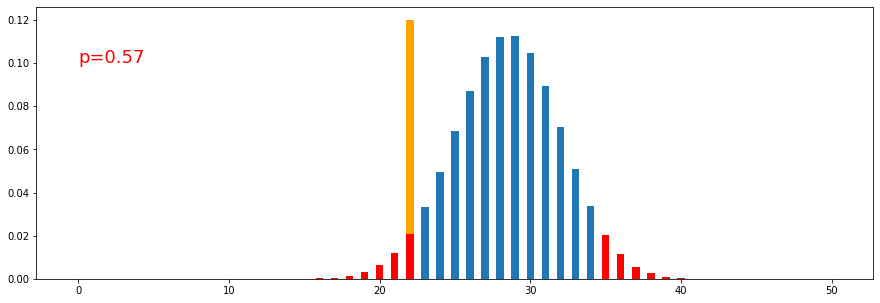

In [407]:
conf_int(p,k);

delta_p = .01
p = p + delta_p;

Ist $\pi_0 $ im Bereich $(0.32, 0.56)$, so wird für die Beobachtung die Nullhypothese $\pi_0$ nicht verwerfen. 